In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [117]:
train = pd.read_csv('projectData/titanic.csv')

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

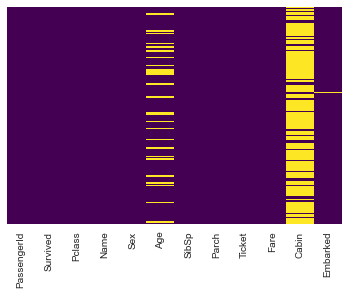

In [120]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False ,cmap='viridis')

In [121]:
sns.set_style('whitegrid')


<AxesSubplot:xlabel='Survived', ylabel='count'>

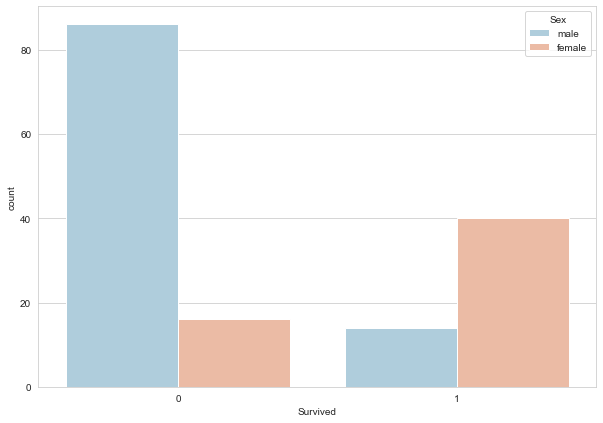

In [129]:
plt.figure(figsize=(10,7))
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

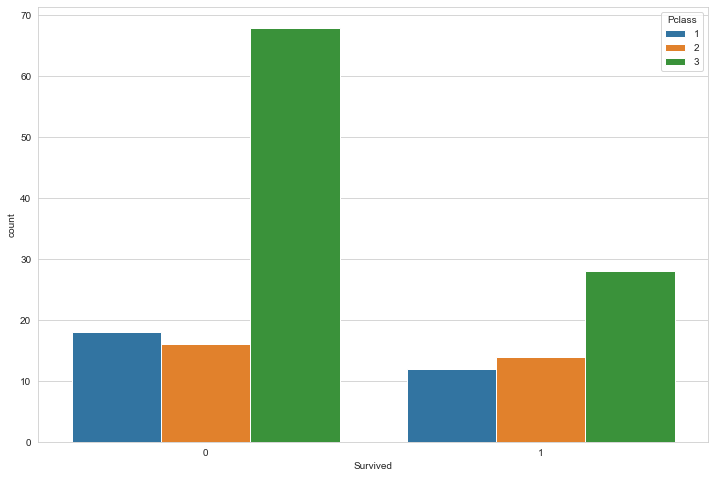

In [132]:
plt.figure(figsize=(12,8))
sns.countplot(train['Survived'],data=train,hue='Pclass')

<AxesSubplot:xlabel='Age'>

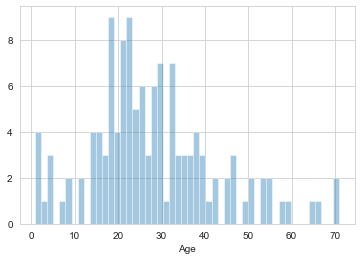

In [133]:
sns.distplot(train['Age'].dropna(),kde=False,bins=50)

<AxesSubplot:ylabel='Frequency'>

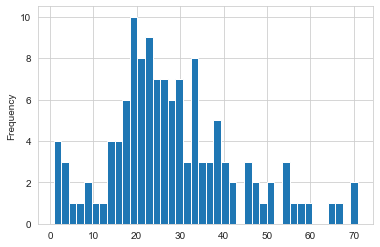

In [134]:
train['Age'].plot.hist(bins=40)

In [135]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
151          152         1       1   
152          153         0       3   
153          154         0       3   
154          155         0       3   
155          156         0       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<AxesSubplot:xlabel='SibSp', ylabel='count'>

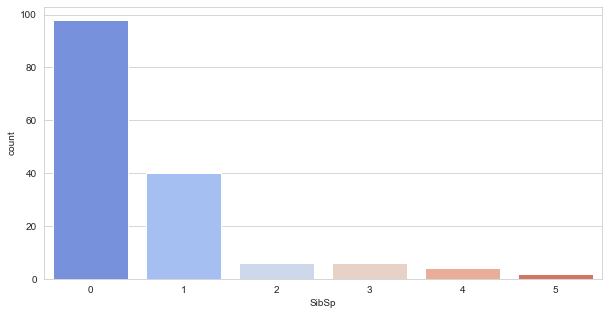

In [141]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',data=train,palette='coolwarm')

<AxesSubplot:>

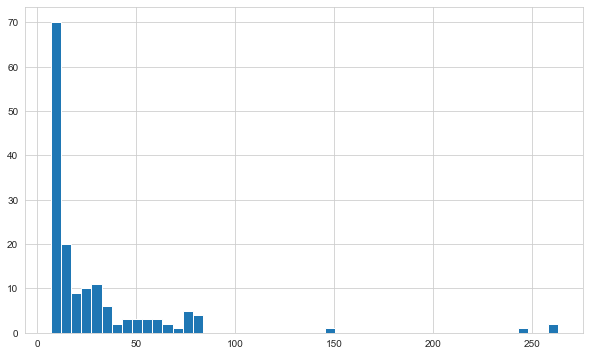

In [142]:
train['Fare'].hist(bins=50,figsize=(10,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

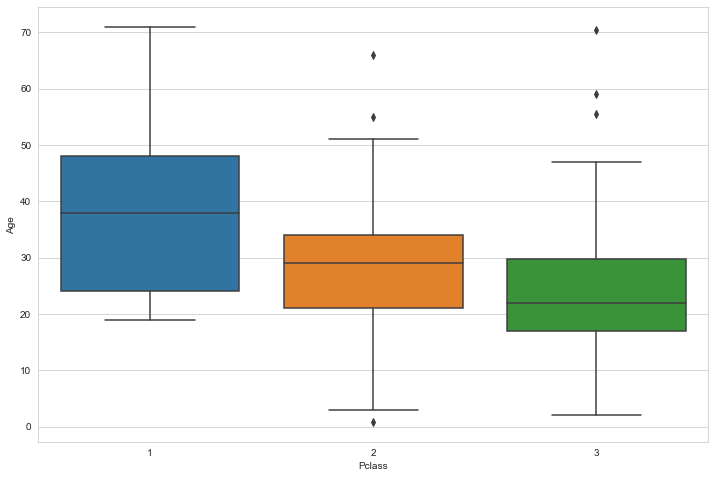

In [145]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y= 'Age',data=train)

In [153]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age

In [154]:
train['Age'] = (train[['Age','Pclass']].apply(impute_age,axis=1))

<AxesSubplot:>

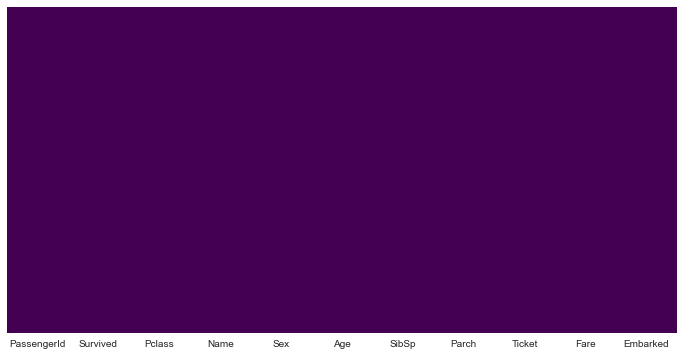

In [162]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [158]:
train.drop('Cabin',axis=1 ,inplace=True)

In [159]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [163]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [166]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [169]:
train = pd.concat([train,sex,embark],axis=1)

In [170]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [172]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [173]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [177]:
train.drop('PassengerId', axis=1, inplace=True)

In [178]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [179]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [180]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logmd = LogisticRegression()

In [200]:
logmd.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [201]:
predictions = logmd.predict(X_test)

In [202]:
from sklearn.metrics import classification_report 

In [203]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.81      0.68      0.74        19

    accuracy                           0.81        47
   macro avg       0.81      0.79      0.80        47
weighted avg       0.81      0.81      0.81        47



In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
print(confusion_matrix(y_test,predictions))

[[25  3]
 [ 6 13]]


In [206]:
from sklearn import metrics


In [207]:
print(metrics.accuracy_score(y_test,predictions))

0.8085106382978723
